# Loading CBF files, do Q-calibration and angular integration

a script for loading and handling CBF files utilzed by the PILATUS detector

In [89]:
import numpy as np
from matplotlib import pyplot as plt
import sys

sys.path.insert(0, '../src/')
from cbf_handling import readcbf
from integrators import*
from utilities import *
import ice_peaks
reload(ice_peaks)
from ice_peaks import *

### Parameters

In [90]:
sample_name  = 'cubic_01'
run_number   = 13
n_frames = 10
i_frame = 60
pilatus_shape =[619,487]

In [33]:
# beam center (You can estimate this with fit2D or with the ring fitting script)
cx,cy = 335,-370
# angular integration parameters
n_bins = 1000           # number of bins
min_x,max_x = 0,760     #n_bins
mask_thr = 0            # threshold limit for integrator

### Files and folders

In [27]:
data_path = '/Volumes/Seagate Backup Plus Drive/DESY_october2017/raw/%s_%05d/p300/'%(sample_name,run_number)

### Load files

In [28]:
data = np.zeros([n_frames,pilatus_shape[0],pilatus_shape[1]])
for i in range(i_frame,i_frame+n_frames):
    file_name = data_path+'%s_%05d_%05d.cbf'%(sample_name,run_number,i+1)
    content = readcbf(file_name,pilatus_shape[0],pilatus_shape[1])
    data[i-i_frame] = np.fliplr(np.reshape(content,(pilatus_shape[0],pilatus_shape[1])))
avg_data = np.average(data,axis=0)

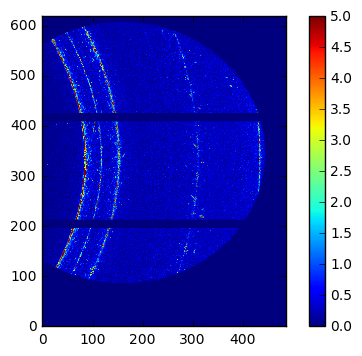

In [18]:
plt.imshow(avg_data,vmax=5,vmin=0,origin='lower left')
plt.colorbar()
plt.show()

### Checking center for angular integration

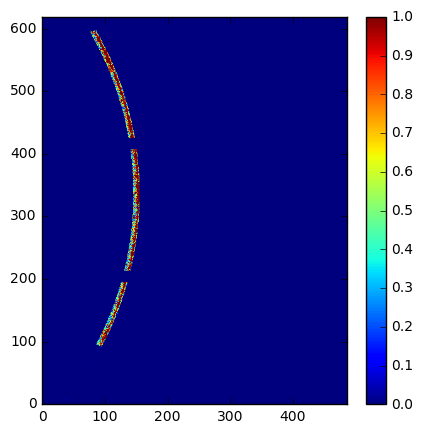

In [19]:
# test mask
inner_radius,width,spacing,num_rings=515,10,0,1
mask = ring_mask(avg_data,(cx,cy),inner_radius=inner_radius,width=width,spacing=spacing,num_rings=num_rings)

# plot
plt.figure(figsize=[5,5])
plt.imshow(mask*avg_data,origin='lower left',vmax=1,vmin=0)
plt.colorbar()
plt.show()

### Angular integration

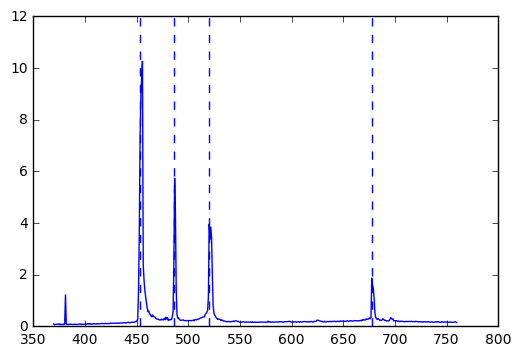

In [84]:
# angular intergation
peaks = [453,486,520,678]
qbin,Iq = angular_average(avg_data, (cx,cy),None,threshold=0, nx=n_bins,  min_x=min_x, max_x=max_x)
plt.plot(qbin,Iq)
for i in range(4):
    plt.axvline(x=peaks[i],ls='--')
plt.show()

### Q-calibration

Load ice peaks

In [85]:
ice_Ih = iceIh_peaks()
print ice_Ih

qmax = ice_Ih[0]
dq = ice_Ih[3]-ice_Ih[0]

[ 1.61297476  1.71327851  1.8264895   2.35318655  2.79464445  3.03451657
  3.22634856  3.27789344  3.33837302  3.6533046 ]


Match maximum position

In [88]:
qmax_bin = peaks[0]#qbin[Iq==max(Iq)]
dq_bin   = peaks[3]-peaks[0]

q = (qbin-qbin_max)*dq/dq_bin+qmax

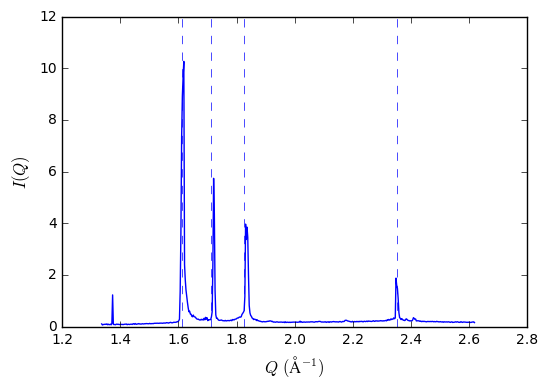

In [87]:
plt.plot(q,Iq)
for i in range(4):
    plt.axvline(x=ice_Ih[i],ls='--',lw=0.5)
plt.ylabel(r'$I(Q)$',size=12)
plt.xlabel(r'$Q$ $\rm(\AA^{-1})$',size=12)
plt.show()